<a href="https://colab.research.google.com/github/anasimicc/Model-molekuli/blob/main/Model_molekuli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prvi model mašinskog učenja

## 1. Učitavanje podataka

In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')


## 2. Priprema podataka

###Podela podataka na x i y

In [7]:
Y = df['logS']
X = df.drop('logS', axis = 1)

### Podela podataka za treniranje i testiranje

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


## Pravljenje modela

### Linearna regresija

**Treniranje modela**

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

**Rad modela nad podacima**

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

**Evaluacija modela**

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']

### Random forest

**Treniranje modela**

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Rad modela nad podacima**

In [13]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

**Evaluacija modela**

In [14]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']

### Random forest sa optimizacijom parametara pomocu Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestRegressor()

param_dist = {
    'n_estimators' : randint(100, 500),
    'max_depth' : [None] + list(range(10,50)),
    'min_samples_split' : randint(2, 11)
}

random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_dist,
    n_iter = 50,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state = 42,
    n_jobs = -1
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, 30, 31, 32,
                                                      33, 34, 35, 36, 37, 38, ...],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c85fd3333a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c85fe63b1c0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [21]:
y_rfo_train_pred = random_search.predict(x_train)
y_rfo_test_pred = random_search.predict(x_test)

rfo_train_mse = mean_squared_error(y_train, y_rfo_train_pred)
rfo_test_mse = mean_squared_error(y_test, y_rfo_test_pred)
rfo_train_r2 = r2_score(y_train, y_rfo_train_pred)
rfo_test_r2 = r2_score(y_test, y_rfo_test_pred)

rfo_results = pd.DataFrame(['Random Forest with Random Search', rfo_train_mse, rfo_train_r2, rfo_test_mse, rfo_test_r2]).transpose()
rfo_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']

## Poredjenje modela

## Prikaz podataka

In [23]:
df_models = pd.concat([lr_results, rf_results, rfo_results], axis = 0)
df_models

,Method,Training_MSE,Training_R2,Testing_MSE,Testing_R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223
0,Random Forest with Random Search,0.094007,0.978028,0.643345,0.867108


### Linearna regresija - plot

Text(0.5, 0, 'Real')

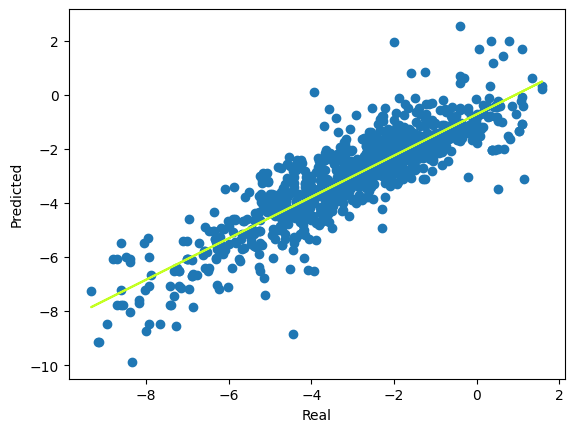

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#C4FF23')
plt.ylabel('Predicted')
plt.xlabel('Real')

### Random forest - plot

Text(0.5, 0, 'Real')

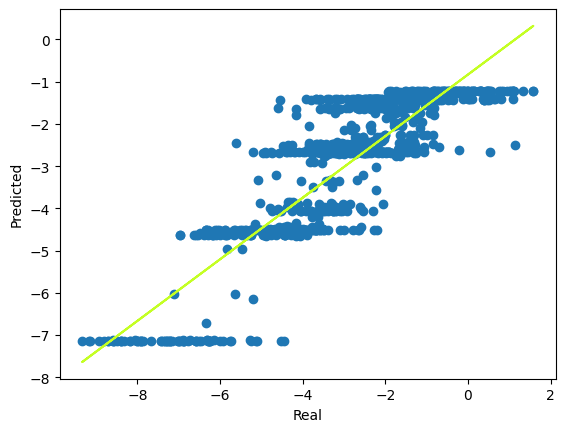

In [19]:
plt.scatter(x = y_train, y = y_rf_train_pred)

h = np.polyfit(y_train, y_rf_train_pred, 1)
r = np.poly1d(h)

plt.plot(y_train, r(y_train), '#C4FF23')
plt.ylabel('Predicted')
plt.xlabel('Real')

### Random forest sa Random Search - plot

Text(0.5, 0, 'Real')

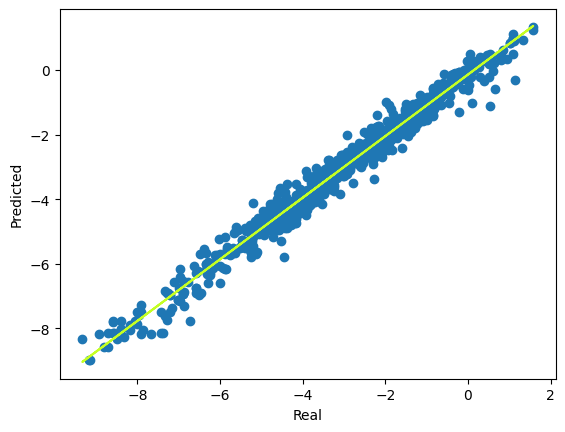

In [24]:
plt.scatter(x = y_train, y = y_rfo_train_pred)

e = np.polyfit(y_train, y_rfo_train_pred, 1)
t = np.poly1d(e)

plt.plot(y_train, t(y_train), '#C4FF23')
plt.ylabel('Predicted')
plt.xlabel('Real')